In [ ]:
from google.colab import drive
import pandas as pd
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

base_path = '/content/drive/MyDrive/mimic_results'
os.listdir('/content/drive/MyDrive/mimic_results')

['query_25_main.csv',
 'vap_target_variable.csv',
 'merged_df.csv',
 'df_cleaned.csv']

In [ ]:
df_target = pd.read_csv(os.path.join(base_path, 'vap_target_variable.csv'))
df_25_main = pd.read_csv(os.path.join(base_path, 'query_25_main.csv'))


In [ ]:
df_target.head()

,subject_id,hadm_id,vap
0,65,143430,0
1,80,115385,0
2,96,170324,0
3,129,164174,0
4,141,168006,0


In [ ]:
df_25_main.head()

,subject_id,hadm_id,gender,age,ethnicity,diabetes,hypertension,myocardial_infarction,cerebral_vascular_disease,hyperlipidemia,...,diabetes_percentage,hypertension_percentage,myocardial_infarction_percentage,cerebral_vascular_disease_percentage,hyperlipidemia_percentage,coronary_heart_disease_percentage,asthma_percentage,chronic_liver_disease_percentage,chronic_renal_disease_percentage,cancer_percentage
0,56,181711,F,300,WHITE,0,1,0,0,1,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
1,18848,103662,F,85,WHITE,0,0,0,0,1,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
2,18848,103662,F,85,WHITE,0,0,0,0,1,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
3,18848,150678,F,83,WHITE,0,0,0,0,1,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
4,18848,123774,F,85,WHITE,0,0,0,0,1,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173


In [ ]:
# Outer left join target_df on subject_id withdf_25_main

df_merged = pd.merge(df_target, df_25_main, on='subject_id', how='left')

In [ ]:
df_merged.head()

,subject_id,hadm_id_x,vap,hadm_id_y,gender,age,ethnicity,diabetes,hypertension,myocardial_infarction,...,diabetes_percentage,hypertension_percentage,myocardial_infarction_percentage,cerebral_vascular_disease_percentage,hyperlipidemia_percentage,coronary_heart_disease_percentage,asthma_percentage,chronic_liver_disease_percentage,chronic_renal_disease_percentage,cancer_percentage
0,65,143430,0,143430,M,26,WHITE,0,0,0,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
1,80,115385,0,115385,M,44,WHITE,0,0,0,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
2,96,170324,0,170324,M,39,WHITE,0,0,0,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
3,129,164174,0,164174,M,37,HISPANIC/LATINO - GUATEMALAN,0,0,0,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173
4,141,168006,0,168006,M,80,OTHER,1,0,0,...,24.114894,36.124864,9.207135,4.028757,24.684617,24.433668,5.960052,5.00373,11.730195,0.049173


In [ ]:
df_merged.shape[0]


3508

In [ ]:
## DESCRIPTION OF DATAFRAME
df_merged.describe()

,subject_id,hadm_id_x,vap,hadm_id_y,age,diabetes,hypertension,myocardial_infarction,cerebral_vascular_disease,hyperlipidemia,...,diabetes_percentage,hypertension_percentage,myocardial_infarction_percentage,cerebral_vascular_disease_percentage,hyperlipidemia_percentage,coronary_heart_disease_percentage,asthma_percentage,chronic_liver_disease_percentage,chronic_renal_disease_percentage,cancer_percentage
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,...,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03
mean,37413.714937,149931.937001,0.024800,149329.279932,78.034208,0.169612,0.367446,0.029361,0.032212,0.161631,...,2.411489e+01,3.612486e+01,9.207135e+00,4.028757e+00,2.468462e+01,2.443367e+01,5.960052e+00,5.003730e+00,1.173020e+01,4.917254e-02
std,28924.749837,28499.911993,0.155539,28578.342242,69.073237,0.375345,0.482178,0.168842,0.176588,0.368164,...,2.060868e-12,3.268963e-13,8.634325e-13,2.789278e-13,2.199443e-12,6.715586e-13,3.384442e-13,3.997373e-14,6.857715e-13,9.021848e-16
min,65.000000,100011.000000,0.000000,100011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.411489e+01,3.612486e+01,9.207135e+00,4.028757e+00,2.468462e+01,2.443367e+01,5.960052e+00,5.003730e+00,1.173020e+01,4.917254e-02
25%,13963.500000,125261.750000,0.000000,124531.250000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.411489e+01,3.612486e+01,9.207135e+00,4.028757e+00,2.468462e+01,2.443367e+01,5.960052e+00,5.003730e+00,1.173020e+01,4.917254e-02
50%,27582.000000,149814.500000,0.000000,148804.500000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.411489e+01,3.612486e+01,9.207135e+00,4.028757e+00,2.468462e+01,2.443367e+01,5.960052e+00,5.003730e+00,1.173020e+01,4.917254e-02
75%,60106.000000,173793.500000,0.000000,173146.750000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.411489e+01,3.612486e+01,9.207135e+00,4.028757e+00,2.468462e+01,2.443367e+01,5.960052e+00,5.003730e+00,1.173020e+01,4.917254e-02
max,99935.000000,199976.000000,1.000000,199976.000000,308.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.411489e+01,3.612486e+01,9.207135e+00,4.028757e+00,2.468462e+01,2.443367e+01,5.960052e+00,5.003730e+00,1.173020e+01,4.917254e-02


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   subject_id                            3508 non-null   int64  
 1   hadm_id_x                             3508 non-null   int64  
 2   vap                                   3508 non-null   int64  
 3   hadm_id_y                             3508 non-null   int64  
 4   gender                                3508 non-null   object 
 5   age                                   3508 non-null   int64  
 6   ethnicity                             3508 non-null   object 
 7   diabetes                              3508 non-null   int64  
 8   hypertension                          3508 non-null   int64  
 9   myocardial_infarction                 3508 non-null   int64  
 10  cerebral_vascular_disease             3508 non-null   int64  
 11  hyperlipidemia   

In [ ]:
# check number of null values in merged df
df_merged.isnull().sum()

,0
subject_id,0
hadm_id_x,0
vap,0
hadm_id_y,0
gender,0
age,0
ethnicity,0
diabetes,0
hypertension,0
myocardial_infarction,0


In [ ]:
# Saving original column metadata for categorical data before performing one-hot encoding.

# 1. Save the original categorical column names
original_categorical_cols = df_merged.select_dtypes(include=['object']).columns.tolist()
print("Original Categorical Columns:", original_categorical_cols)

Original Categorical Columns: ['gender', 'ethnicity']


In [ ]:
#print unique values in categorical columns
for col in original_categorical_cols:
  print(col, df_merged[col].unique())

gender ['M' 'F']
ethnicity ['WHITE' 'HISPANIC/LATINO - GUATEMALAN' 'OTHER' 'UNKNOWN/NOT SPECIFIED'
 'HISPANIC/LATINO - PUERTO RICAN' 'BLACK/AFRICAN AMERICAN'
 'HISPANIC OR LATINO' 'PATIENT DECLINED TO ANSWER' 'ASIAN'
 'UNABLE TO OBTAIN' 'WHITE - EASTERN EUROPEAN'
 'HISPANIC/LATINO - DOMINICAN' 'MULTI RACE ETHNICITY' 'WHITE - BRAZILIAN'
 'WHITE - RUSSIAN' 'ASIAN - CHINESE' 'ASIAN - ASIAN INDIAN'
 'ASIAN - VIETNAMESE' 'BLACK/HAITIAN' 'BLACK/CAPE VERDEAN'
 'HISPANIC/LATINO - SALVADORAN' 'SOUTH AMERICAN' 'ASIAN - KOREAN'
 'HISPANIC/LATINO - MEXICAN' 'HISPANIC/LATINO - HONDURAN' 'MIDDLE EASTERN'
 'ASIAN - OTHER' 'PORTUGUESE' 'WHITE - OTHER EUROPEAN']


In [ ]:
# Ensure the mapping dictionary keys are stripped and lowercase


# Clean and map the 'gender' column
gender_dict = {'m': 0, 'f': 1}
df_merged['gender'] = df_merged['gender'].str.strip().str.lower().map(gender_dict)

ethnicity_dict = {
    'white': 20,
    'hispanic/latino - guatemalan': 1,
    'other': 2,
    'unknown/not specified': 3,
    'hispanic/latino - puerto rican': 4,
    'black/african american': 5,
    'hispanic or latino': 6,
    'patient declined to answer': 7,
    'asian': 8,
    'unable to obtain': 9,
    'white - eastern european': 10,
    'hispanic/latino - dominican': 11,
    'multi race ethnicity': 12,
    'white - brazilian': 13,
    'white - russian': 14,
    'asian - chinese': 15,
    'asian - asian indian': 16,
    'asian - vietnamese': 17,
    'black/haitian': 18,
    'black/cape verdean': 19,
    'hispanic/latino - salvadoran': 20,
    'south american': 21,
    'asian - korean': 22,
    'hispanic/latino - mexican': 23,
    'hispanic/latino - honduran': 24,
    'middle eastern': 25,
    'asian - other': 26,
    'portuguese': 27,
    'white - other european': 28
}
# Clean and map the 'ethnicity' column
df_merged['ethnicity'] = (
    df_merged['ethnicity']
    .str.strip()
    .str.lower()
    .map(ethnicity_dict)
)

# Check for unmapped values
unmapped_ethnicities = df_merged[df_merged['ethnicity'].isnull()]
if not unmapped_ethnicities.empty:
    print("Unmapped Ethnicities:")
    print(unmapped_ethnicities['ethnicity'].unique())




{0: ['hadm_id_y', 'subject_id', 'age', 'vap', 'hadm_id_x', 'gender'], 1: ['ethnicity', 'myocardial_infarction', 'diabetes', 'hyperlipidemia', 'hypertension', 'vap', 'cerebral_vascular_disease'], 2: ['heart_rate', 'asthma', 'vap', 'cancer', 'coronary_heart_disease', 'chronic_renal_disease', 'chronic_liver_disease'], 3: ['white_blood_cell', 'hemoglobin', 'platelet', 'tracheostomy', 'systolic_bp', 'vap', 'gcs'], 4: ['vasopressor', 'mortality_30d', 'vap', 'icustay_length', 'hospital_stay_length', 'diabetes_percentage', 'hypertension_percentage'], 5: ['hyperlipidemia_percentage', 'myocardial_infarction_percentage', 'vap', 'asthma_percentage', 'chronic_liver_disease_percentage', 'cerebral_vascular_disease_percentage', 'coronary_heart_disease_percentage'], 6: ['cancer_percentage', 'vap', 'chronic_renal_disease_percentage']}


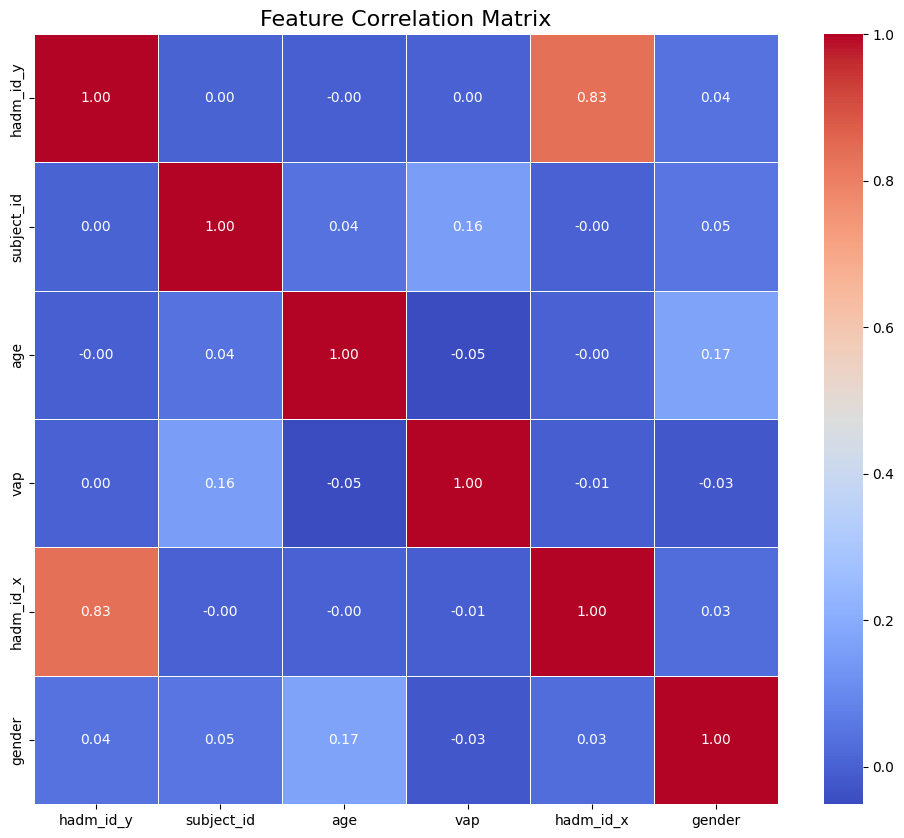

In [ ]:
# creating multiple plots.

plot_dict = {}

target_col = 'vap'

# pick up 6 columns and then put them in a list in plot_dict
for each_column in range(0, len(df_merged.columns), 6):
    idx = int(each_column/6)
    plot_dict[idx] = df_merged.columns[each_column:each_column+6].tolist()
    plot_dict[idx].append(target_col)
    # convert to set and list to remove duplicate
    plot_dict[idx] = list(set(plot_dict[idx]))
    #print(plot_dict[each_column])

print(plot_dict)

# Create correlation matrix from 1st key columns in plot_dict on merged_df
corr_matrix = df_merged[plot_dict[0]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Matrix", size=16)

# Show the plot
plt.show()


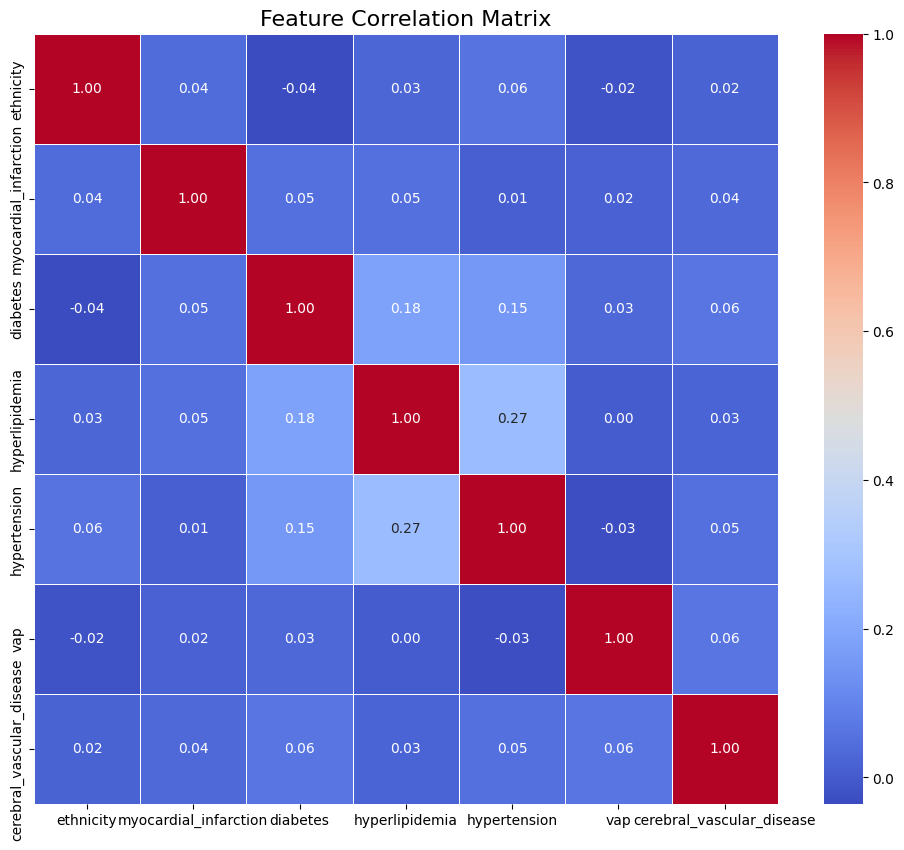

In [ ]:
# Create correlation matrix from 1st key columns in plot_dict on merged_df
corr_matrix = df_merged[plot_dict[1]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Matrix", size=16)

# Show the plot
plt.show()

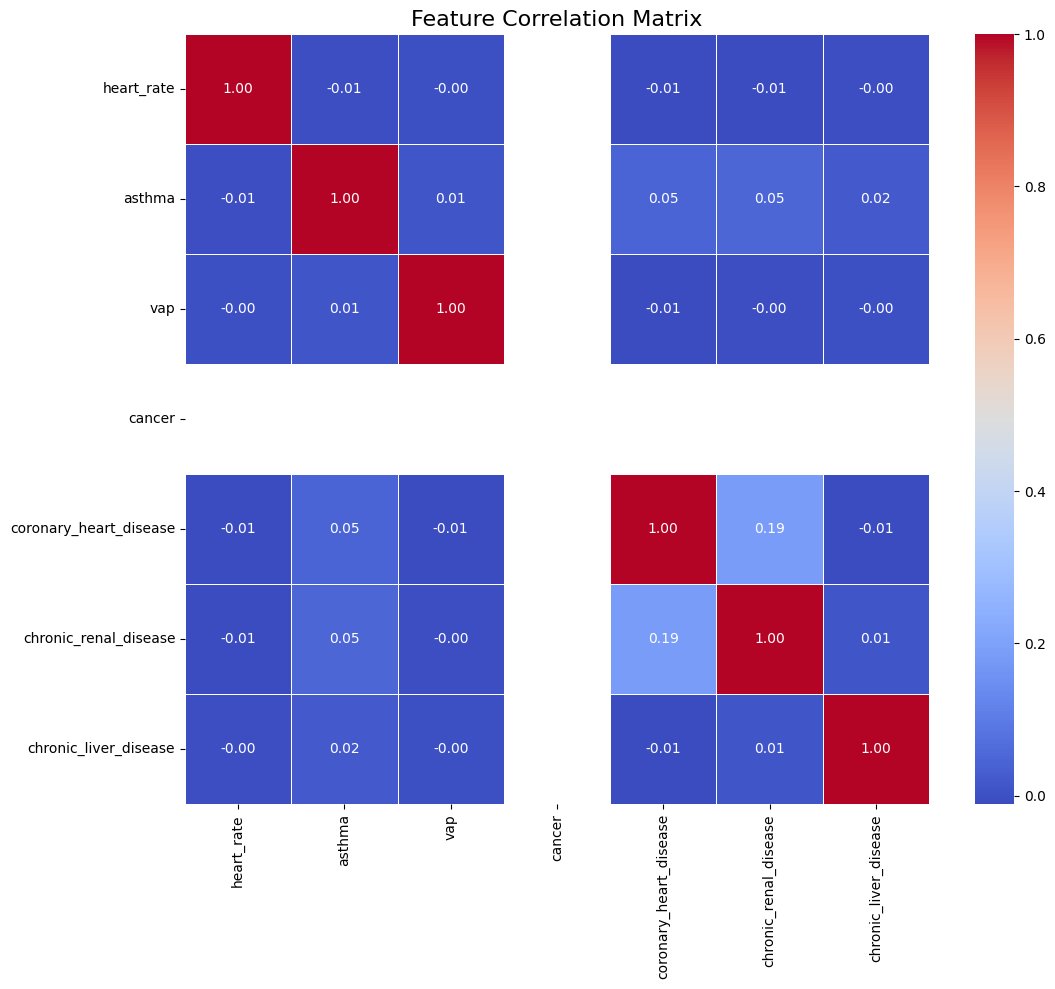

In [ ]:
# Create correlation matrix from 1st key columns in plot_dict on merged_df
corr_matrix = df_merged[plot_dict[2]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Matrix", size=16)

# Show the plot
plt.show()

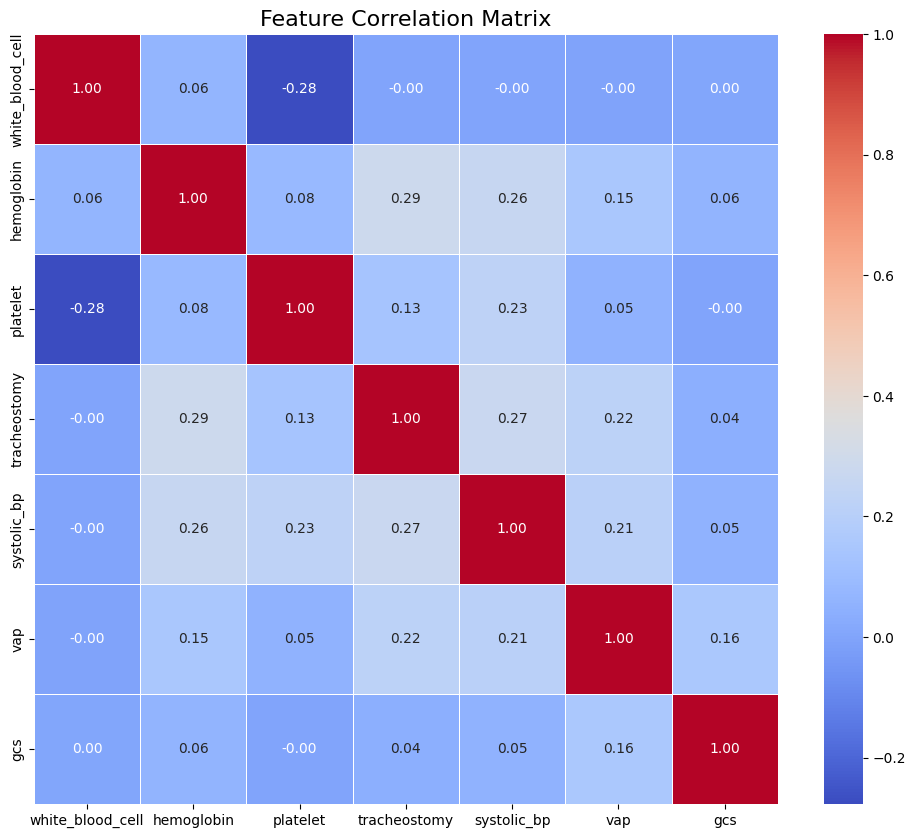

In [ ]:
# Create correlation matrix from 1st key columns in plot_dict on merged_df
corr_matrix = df_merged[plot_dict[3]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Matrix", size=16)

# Show the plot
plt.show()

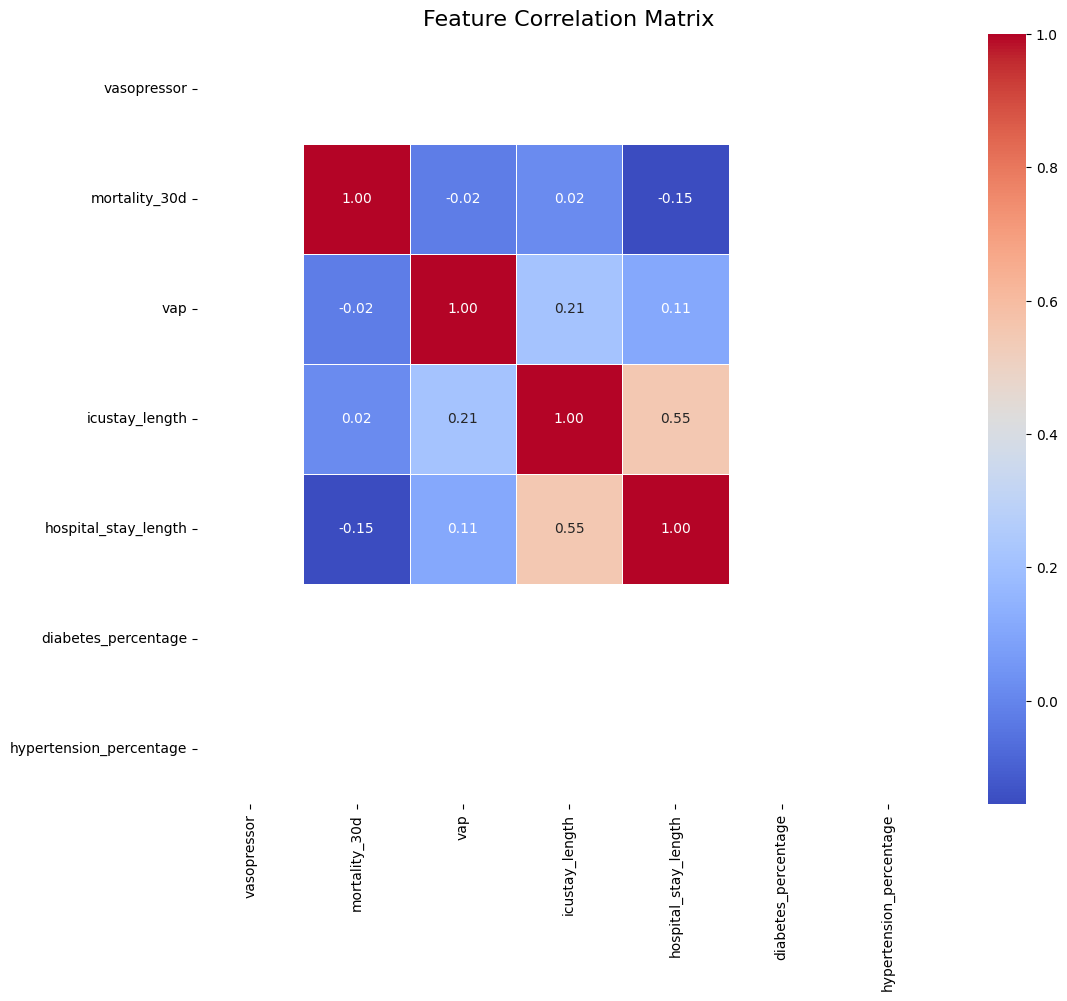

In [ ]:
# Create correlation matrix from 1st key columns in plot_dict on merged_df
corr_matrix = df_merged[plot_dict[4]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Matrix", size=16)

# Show the plot
plt.show()

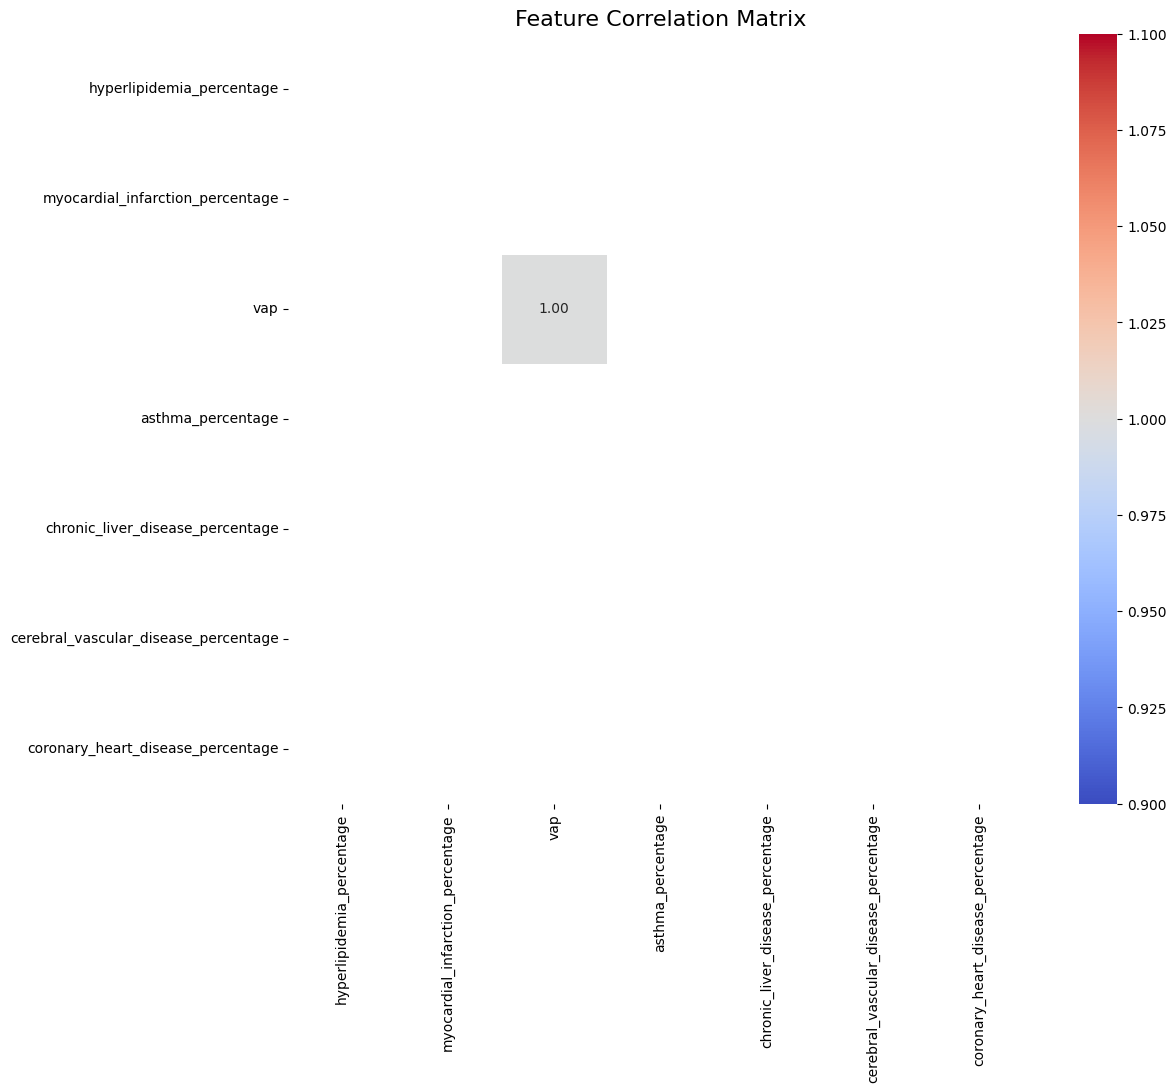

In [ ]:
# Create correlation matrix from 1st key columns in plot_dict on merged_df
corr_matrix = df_merged[plot_dict[5]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Matrix", size=16)

# Show the plot
plt.show()

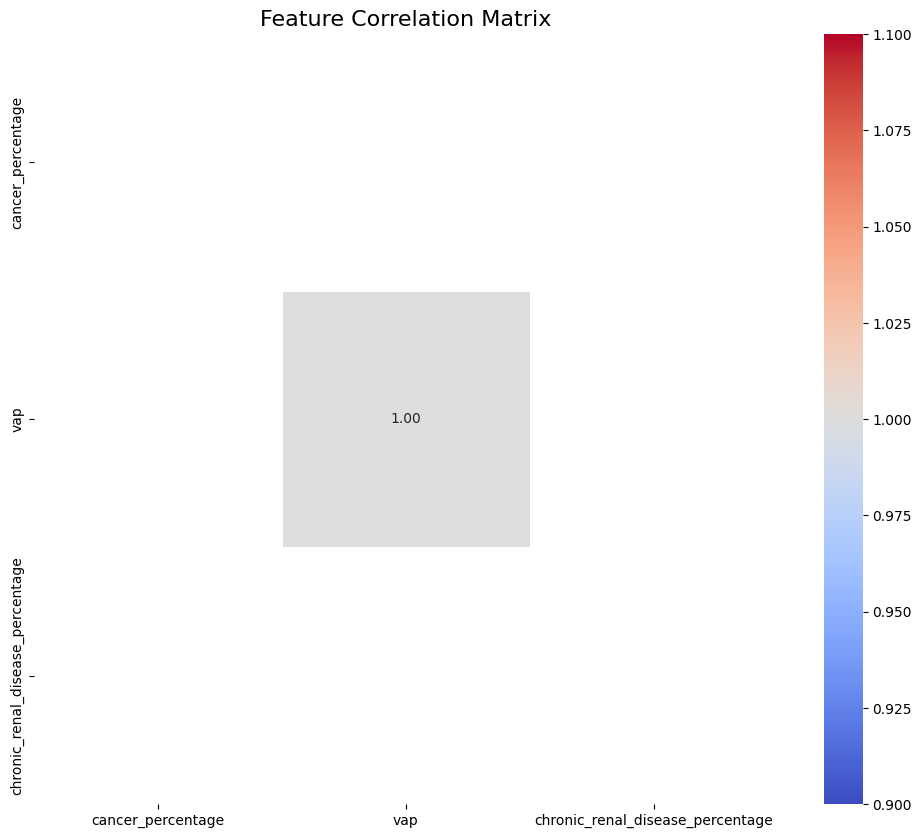

In [ ]:
# Create correlation matrix from 1st key columns in plot_dict on merged_df
corr_matrix = df_merged[plot_dict[6]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Matrix", size=16)

# Show the plot
plt.show()

In [ ]:
df_merged.to_csv(os.path.join(base_path, 'merged_df.csv'), index=False)

In [ ]:
# deleting the following columns due to low correlation.
# If the correlation (with VAP) is around 0, it means there is a weak correlation - as in, increasing one thing has no impact on the other.
# If values are repeating, they will give weak correlation.
#

# Same value columns:

#'cancer', 'diabetes_percentage', 'vasopressor', 'hypertension_percentage', 'chronic_liver_disease_percentage',
#'cerebral_vascular_disease_percentage', 'asthma_percentage', 'hyperlipidemia_percentage', 'coronary_heart_disease_percentage',
#'myocardial_infarction_percentage' , 'chronic_renal_disease_percentage', 'cancer_percentage'

# Weak correlation columns:

# 'hadm_id_y', 'hadm_id_x', 'hyperlipidemia', 'chronic_liver_disease', 'heart_rate', 'chronic_renal_disease', 'white_blood_cell'


columns_to_drop = ['hadm_id_y', 'hadm_id_x', 'hyperlipidemia', 'chronic_liver_disease', 'heart_rate', 'chronic_renal_disease', 'cancer', 'white_blood_cell', 'diabetes_percentage', 'vasopressor', 'hypertension_percentage', 'chronic_liver_disease_percentage', 'cerebral_vascular_disease_percentage', 'asthma_percentage', 'hyperlipidemia_percentage', 'coronary_heart_disease_percentage', 'myocardial_infarction_percentage', 'chronic_renal_disease_percentage',  'cancer_percentage' ]

# delete these columns
df_merged.drop(columns_to_drop, axis=1, inplace=True)

df_merged.head()

,subject_id,vap,gender,age,ethnicity,diabetes,hypertension,myocardial_infarction,cerebral_vascular_disease,coronary_heart_disease,asthma,systolic_bp,gcs,hemoglobin,platelet,tracheostomy,mortality_30d,icustay_length,hospital_stay_length
0,65,0,0,26,20,0,0,0,0,0,0,NaN,NaN,313.0,12.9,NaN,0,3.0,10
1,80,0,0,44,20,0,0,0,0,0,0,NaN,NaN,234.0,12.1,NaN,0,1.0,5
2,96,0,0,39,20,0,0,0,0,0,0,NaN,NaN,1007.0,15.0,NaN,0,20.0,29
3,129,0,0,37,1,0,0,0,0,0,0,NaN,NaN,218.0,13.9,NaN,0,1.0,9
4,141,0,0,80,2,1,0,0,0,0,0,NaN,NaN,179.0,15.9,NaN,1,3.0,3


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 3508 non-null   int64  
 1   vap                        3508 non-null   int64  
 2   gender                     3508 non-null   int64  
 3   age                        3508 non-null   int64  
 4   ethnicity                  3508 non-null   int64  
 5   diabetes                   3508 non-null   int64  
 6   hypertension               3508 non-null   int64  
 7   myocardial_infarction      3508 non-null   int64  
 8   cerebral_vascular_disease  3508 non-null   int64  
 9   coronary_heart_disease     3508 non-null   int64  
 10  asthma                     3508 non-null   int64  
 11  systolic_bp                1478 non-null   float64
 12  gcs                        1477 non-null   float64
 13  hemoglobin                 3451 non-null   float

In [ ]:
# check number of null values in merged df
df_merged.isnull().sum()

,0
subject_id,0
vap,0
gender,0
age,0
ethnicity,0
diabetes,0
hypertension,0
myocardial_infarction,0
cerebral_vascular_disease,0
coronary_heart_disease,0


In [ ]:
# Filling up missing values of ______




# List of columns to impute
columns_to_impute = ['systolic_bp', 'gcs', 'tracheostomy']

# Copy the dataset to avoid overwriting original data
df_imputed = df_merged.copy()

# Imputation loop for each target column
for target_col in columns_to_impute:
    # Split data into rows with and without missing values in the target column
    df_missing = df_imputed[df_imputed[target_col].isnull()]
    df_not_missing = df_imputed.dropna(subset=[target_col])

    # Define feature columns (all other columns except the target one)
    feature_cols = [col for col in df_imputed.columns if col != target_col]
    feature_cols = [col for col in feature_cols if col not in columns_to_impute]
    feature_cols = [col for col in feature_cols if df_imputed[col].isnull().sum() == 0]

    X_train = df_not_missing[feature_cols]
    y_train = df_not_missing[target_col]
    X_missing = df_missing[feature_cols]

    # Check if there are any missing values in the features before training
    if X_train.isnull().sum().sum() > 0:
        print(f"Warning: Missing values in features. Impute or drop missing features for {target_col}.")
        continue

    # KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=5)
    knn_predictions = knn_imputer.fit_transform(df_imputed)[df_missing.index, df_imputed.columns.get_loc(target_col)]

    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_missing)

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_missing)

    # Average the predictions
    ensemble_predictions = (knn_predictions + rf_predictions + lr_predictions) / 3

    # Fill in the missing values with ensemble predictions
    df_imputed.loc[df_missing.index, target_col] = ensemble_predictions

# Display the imputed DataFrame
print("Imputed DataFrame with missing values filled:")
print(df_imputed[columns_to_impute].isnull().sum())  # Check if all missing values are filled
print(df_imputed.head())


Imputed DataFrame with missing values filled:
systolic_bp     0
gcs             0
tracheostomy    0
dtype: int64
   subject_id  vap  gender  age  ethnicity  diabetes  hypertension  \
0          65    0       0   26         20         0             0   
1          80    0       0   44         20         0             0   
2          96    0       0   39         20         0             0   
3         129    0       0   37          1         0             0   
4         141    0       0   80          2         1             0   

   myocardial_infarction  cerebral_vascular_disease  coronary_heart_disease  \
0                      0                          0                       0   
1                      0                          0                       0   
2                      0                          0                       0   
3                      0                          0                       0   
4                      0                          0                    

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 3508 non-null   int64  
 1   vap                        3508 non-null   int64  
 2   gender                     3508 non-null   int64  
 3   age                        3508 non-null   int64  
 4   ethnicity                  3508 non-null   int64  
 5   diabetes                   3508 non-null   int64  
 6   hypertension               3508 non-null   int64  
 7   myocardial_infarction      3508 non-null   int64  
 8   cerebral_vascular_disease  3508 non-null   int64  
 9   coronary_heart_disease     3508 non-null   int64  
 10  asthma                     3508 non-null   int64  
 11  systolic_bp                3508 non-null   float64
 12  gcs                        3508 non-null   float64
 13  hemoglobin                 3451 non-null   float

In [ ]:
# check number of null values in merged df
df_imputed.isnull().sum()

,0
subject_id,0
vap,0
gender,0
age,0
ethnicity,0
diabetes,0
hypertension,0
myocardial_infarction,0
cerebral_vascular_disease,0
coronary_heart_disease,0


In [ ]:
# Impute remaining null columns with median

# List of columns to impute using median
columns_to_impute_median = ['icustay_length', 'hemoglobin', 'platelet']

# Fill missing values in the specified columns with the median
for col in columns_to_impute_median:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# Check the result after median imputation
print("Imputed DataFrame after median imputation:")
print(df_imputed[columns_to_impute_median].isnull().sum())  # Check if all missing values are filled
print(df_imputed.head())


Imputed DataFrame after median imputation:
icustay_length    0
hemoglobin        0
platelet          0
dtype: int64
   subject_id  vap  gender  age  ethnicity  diabetes  hypertension  \
0          65    0       0   26         20         0             0   
1          80    0       0   44         20         0             0   
2          96    0       0   39         20         0             0   
3         129    0       0   37          1         0             0   
4         141    0       0   80          2         1             0   

   myocardial_infarction  cerebral_vascular_disease  coronary_heart_disease  \
0                      0                          0                       0   
1                      0                          0                       0   
2                      0                          0                       0   
3                      0                          0                       0   
4                      0                          0                 

In [ ]:
# check number of null values in merged df
df_imputed.isnull().sum()

,0
subject_id,0
vap,0
gender,0
age,0
ethnicity,0
diabetes,0
hypertension,0
myocardial_infarction,0
cerebral_vascular_disease,0
coronary_heart_disease,0


In [ ]:
df_imputed.describe()

,subject_id,vap,gender,age,ethnicity,diabetes,hypertension,myocardial_infarction,cerebral_vascular_disease,coronary_heart_disease,asthma,systolic_bp,gcs,hemoglobin,platelet,tracheostomy,mortality_30d,icustay_length,hospital_stay_length
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000
mean,37413.714937,0.024800,0.378563,78.034208,16.503136,0.169612,0.367446,0.029361,0.032212,0.112885,0.032497,29.824132,101.684809,347.286203,14.968016,0.431353,0.143101,4.093786,10.026226
std,28924.749837,0.155539,0.485098,69.073237,6.527758,0.375345,0.482178,0.168842,0.176588,0.316497,0.177342,7.693730,223.342216,206.404233,2.175783,0.345422,0.350226,5.570866,11.828925
min,65.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,57.000000,18.000000,11.600000,0.000000,0.000000,0.000000,0.000000
25%,13963.500000,0.000000,0.000000,44.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.048647,92.924455,220.000000,13.500000,0.149199,0.000000,1.000000,3.000000
50%,27582.000000,0.000000,0.000000,65.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.940840,99.000000,289.000000,14.400000,0.387735,0.000000,2.000000,6.000000
75%,60106.000000,0.000000,1.000000,81.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32.169136,100.000000,408.250000,15.800000,0.631640,0.000000,4.000000,13.000000
max,99935.000000,1.000000,1.000000,308.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,220.000000,9696.000000,2051.000000,35.100000,1.517077,1.000000,59.000000,202.000000


In [ ]:
# Applying Min Max normalization on various columns
df = df_imputed.copy()
scaler = MinMaxScaler()
df[['age', 'systolic_bp', 'gcs', 'hemoglobin', 'platelet', 'icustay_length', 'hospital_stay_length']] = scaler.fit_transform(df[['age', 'systolic_bp', 'gcs', 'hemoglobin', 'platelet', 'icustay_length', 'hospital_stay_length']])

In [ ]:
df.describe()

,subject_id,vap,gender,age,ethnicity,diabetes,hypertension,myocardial_infarction,cerebral_vascular_disease,coronary_heart_disease,asthma,systolic_bp,gcs,hemoglobin,platelet,tracheostomy,mortality_30d,icustay_length,hospital_stay_length
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000
mean,37413.714937,0.024800,0.378563,0.253358,16.503136,0.169612,0.367446,0.029361,0.032212,0.112885,0.032497,0.098693,0.004636,0.161971,0.143320,0.431353,0.143101,0.069386,0.049635
std,28924.749837,0.155539,0.485098,0.224264,6.527758,0.375345,0.482178,0.168842,0.176588,0.316497,0.177342,0.036463,0.023171,0.101527,0.092587,0.345422,0.350226,0.094421,0.058559
min,65.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13963.500000,0.000000,0.000000,0.142857,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080799,0.003727,0.099361,0.080851,0.149199,0.000000,0.016949,0.014851
50%,27582.000000,0.000000,0.000000,0.211039,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094506,0.004357,0.133301,0.119149,0.387735,0.000000,0.033898,0.029703
75%,60106.000000,0.000000,1.000000,0.262987,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.109806,0.004461,0.191958,0.178723,0.631640,0.000000,0.067797,0.064356
max,99935.000000,1.000000,1.000000,1.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.517077,1.000000,1.000000,1.000000


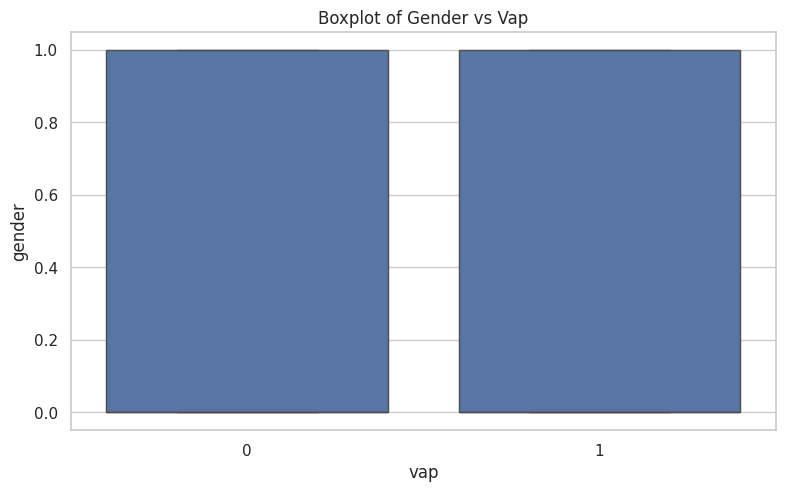

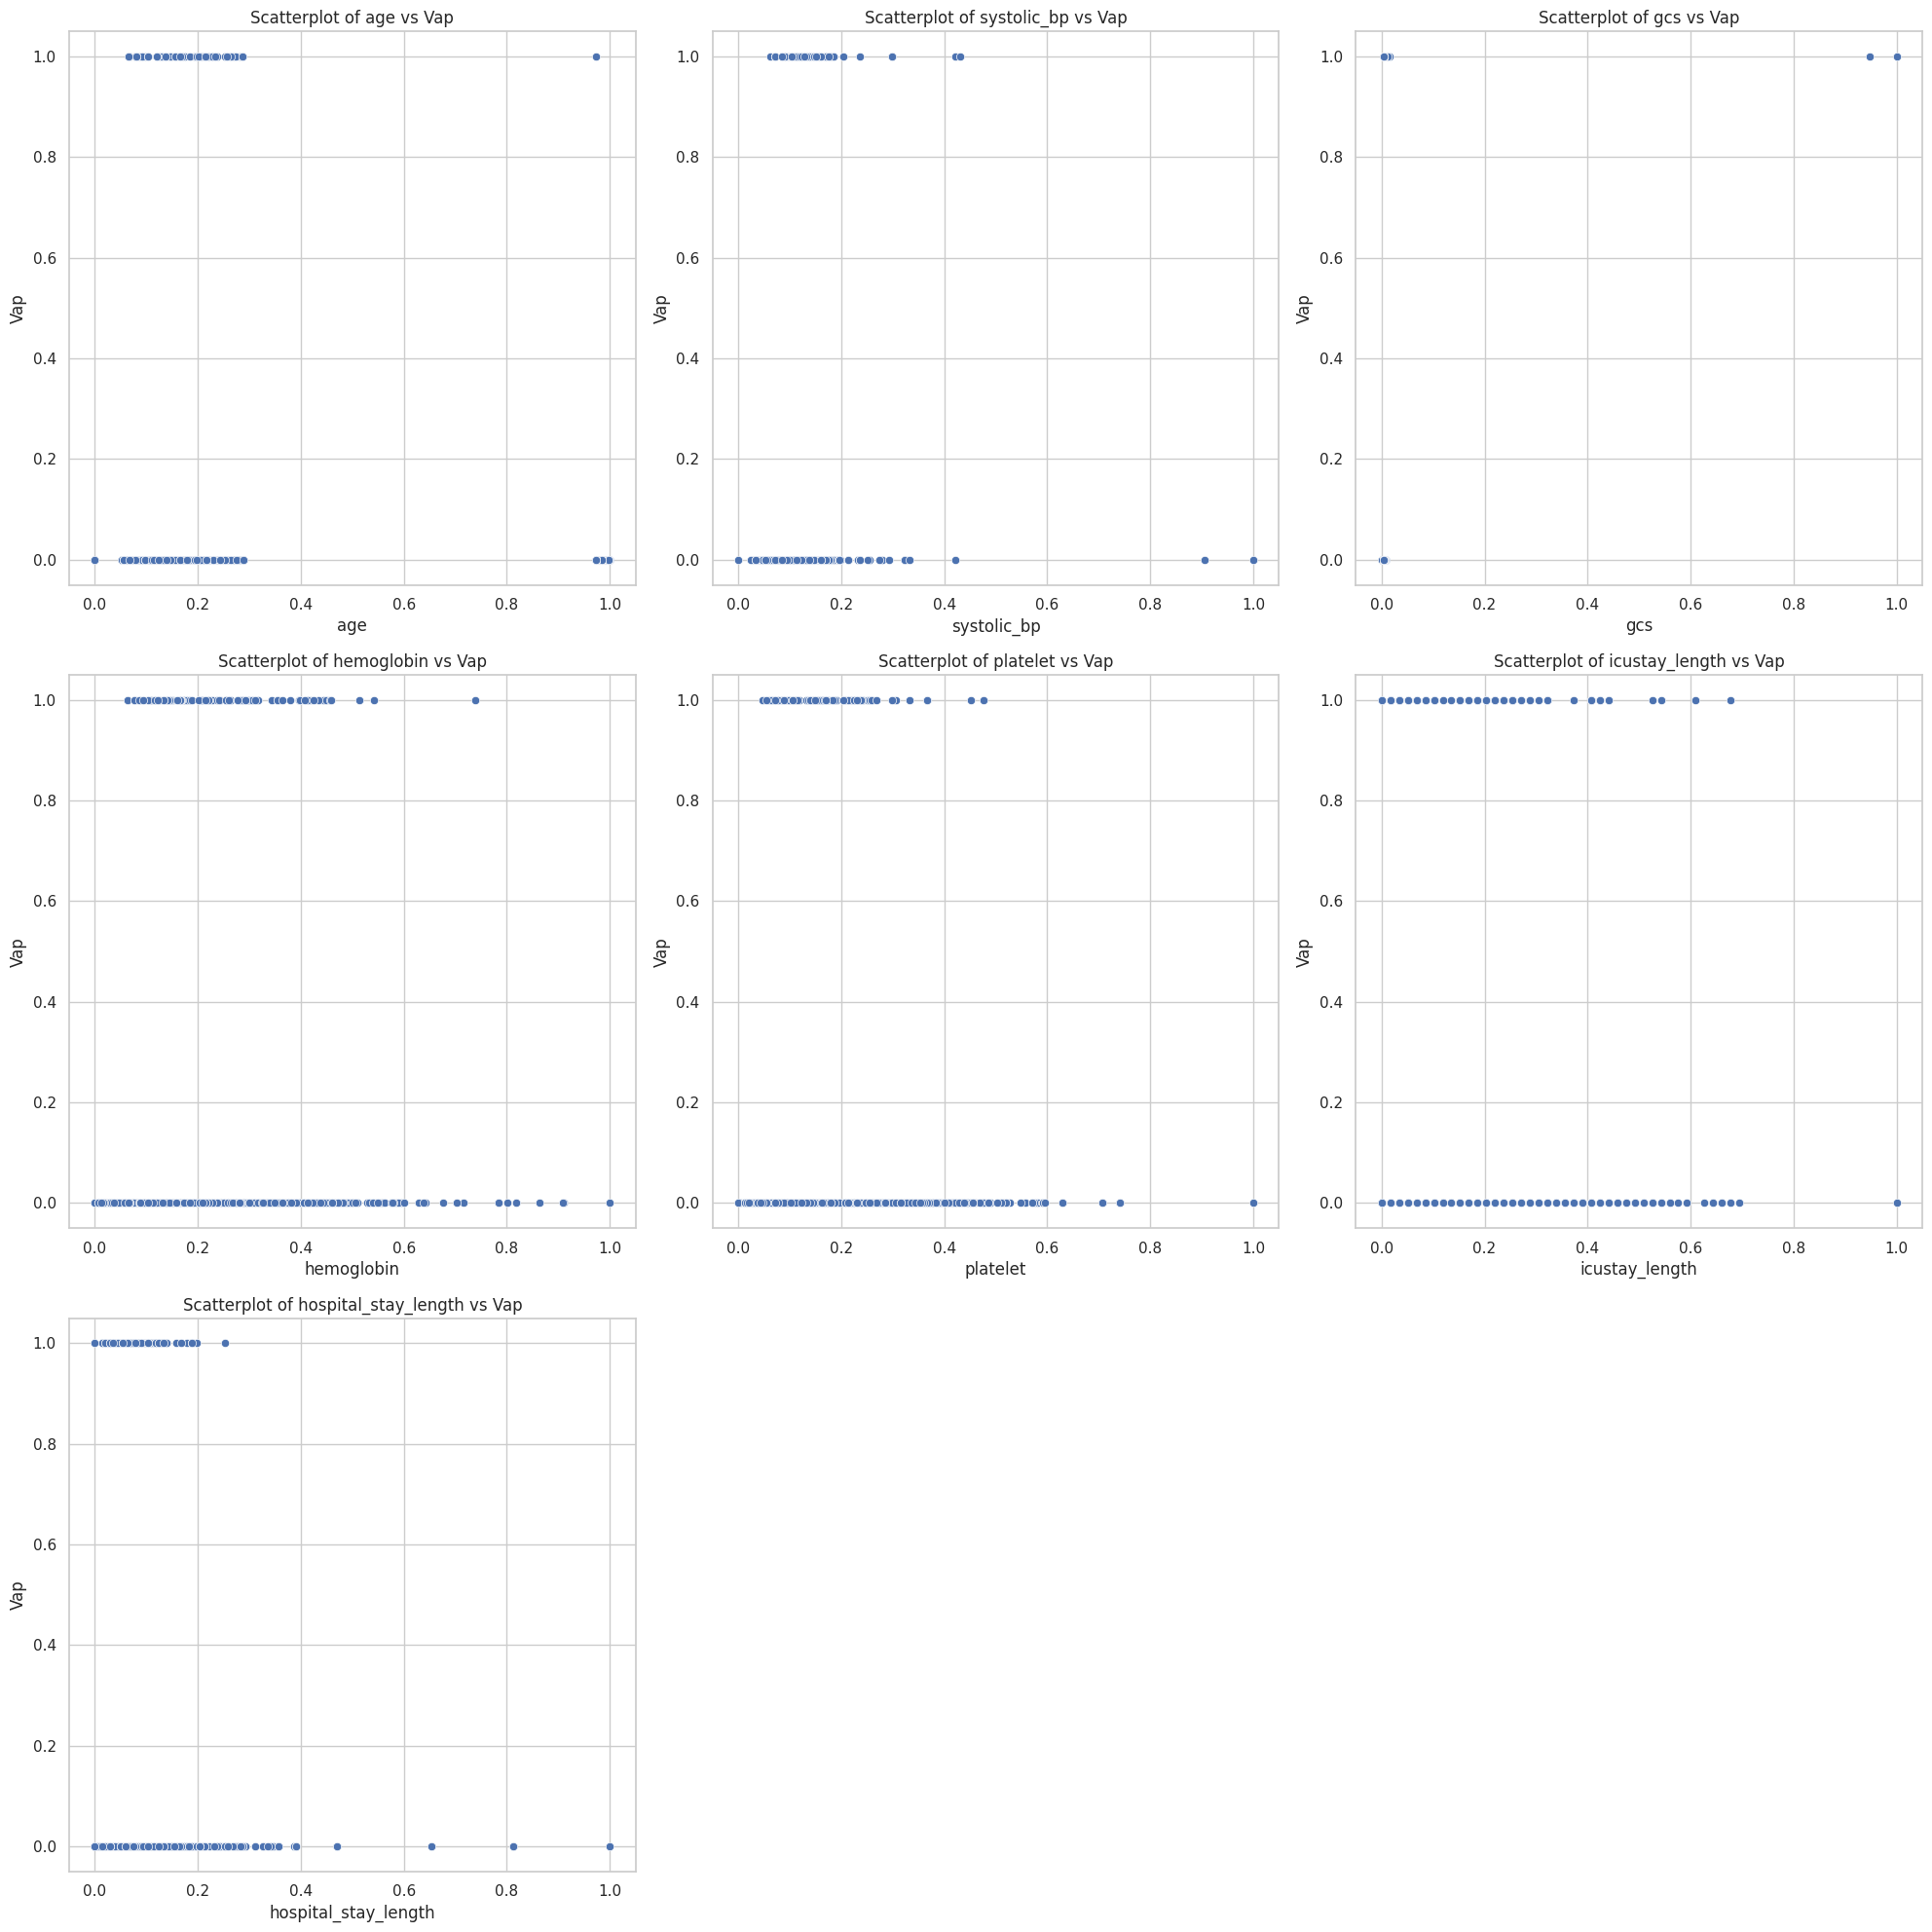

In [ ]:
# Set the style of the plots for better visualization
sns.set(style="whitegrid")

# List of numeric columns to plot against target 'vap'
numeric_columns = ['age', 'systolic_bp', 'gcs', 'hemoglobin', 'platelet', 'icustay_length', 'hospital_stay_length']

# Create the plots
plt.figure(figsize=(20, 30))

# Boxplots for categorical features against target 'vap'
plt.subplot(5, 2, 1)
sns.boxplot(x='vap', y='gender', data=df)
plt.title('Boxplot of Gender vs Vap')



# Scatter Plots for Numeric Features against target 'vap'
plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['vap'])
    plt.title(f'Scatterplot of {col} vs Vap')
    plt.xlabel(col)
    plt.ylabel('Vap')

###############
plt.tight_layout()
plt.show()

In [ ]:
# List of numeric columns you want to check for outliers
numeric_columns = ['age', 'systolic_bp', 'gcs', 'hemoglobin', 'platelet', 'icustay_length', 'hospital_stay_length']

# Iterate through each column and calculate the IQR for outlier detection
for col in numeric_columns:
    # Calculate the 1st and 3rd quartiles (Q1 and Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print the min and max values for context
    print(f"\nColumn: {col}")
    print(f"Min value: {df[col].min()} | Max value: {df[col].max()}")
    print(f"Lower bound for outliers: {lower_bound} | Upper bound for outliers: {upper_bound}")

    # Filter out the outliers and display them
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Print the outliers if any exist
    if not outliers.empty:
        print(f"Outliers in column '{col}':")
        print(outliers[[col]])
    else:
        print(f"No outliers found in column '{col}'")


Column: age
Min value: 0.0 | Max value: 1.0
Lower bound for outliers: -0.03733766233766231 | Upper bound for outliers: 0.4431818181818182
Outliers in column 'age':
           age
57    0.974026
64    0.974026
78    0.974026
84    0.974026
106   0.974026
...        ...
3421  0.974026
3463  0.974026
3470  0.974026
3486  0.974026
3489  0.974026

[283 rows x 1 columns]

Column: systolic_bp
Min value: 0.0 | Max value: 1.0
Lower bound for outliers: 0.03728868733459741 | Upper bound for outliers: 0.15331691812554119
Outliers in column 'systolic_bp':
      systolic_bp
33       0.157878
60       0.161784
116      0.180095
127      0.177096
143      0.163528
...           ...
3405     0.905213
3413     0.033175
3465     0.161137
3492     0.033175
3495     0.274882

[151 rows x 1 columns]

Column: gcs
Min value: 0.0 | Max value: 0.9999999999999999
Lower bound for outliers: 0.0026259091925202446 | Upper bound for outliers: 0.005562124367255777
Outliers in column 'gcs':
           gcs
18    0.0025

In [ ]:
''' # Deletion of outliers commented


# Make a copy of the dataset to preserve the original data
df_cleaned = df.copy()

# Iterate through each column and remove outliers
for col in numeric_columns:
    # Calculate the 1st and 3rd quartiles (Q1 and Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the column values are outside the bounds
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Display the cleaned dataset
print("\nDataset after removing outliers:")
print(df_cleaned)

# Compare the size of the original dataset and the cleaned dataset
print(f"\nOriginal dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
'''
# FINAL CLEANED HEAD AFTER REMOVING THE OUTLIERS
#df_cleaned.head()
#df_cleaned.describe()

' # Deletion of outliers commented\n\n\n# Make a copy of the dataset to preserve the original data\ndf_cleaned = df.copy()\n\n# Iterate through each column and remove outliers\nfor col in numeric_columns:\n    # Calculate the 1st and 3rd quartiles (Q1 and Q3)\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n\n    # Calculate the bounds for outliers\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    # Remove rows where the column values are outside the bounds\n    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]\n\n# Display the cleaned dataset\nprint("\nDataset after removing outliers:")\nprint(df_cleaned)\n\n# Compare the size of the original dataset and the cleaned dataset\nprint(f"\nOriginal dataset size: {df.shape[0]} rows")\nprint(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")\n'

In [ ]:
df.describe()

,subject_id,vap,gender,age,ethnicity,diabetes,hypertension,myocardial_infarction,cerebral_vascular_disease,coronary_heart_disease,asthma,systolic_bp,gcs,hemoglobin,platelet,tracheostomy,mortality_30d,icustay_length,hospital_stay_length
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000
mean,37413.714937,0.024800,0.378563,0.253358,16.503136,0.169612,0.367446,0.029361,0.032212,0.112885,0.032497,0.098693,0.004636,0.161971,0.143320,0.431353,0.143101,0.069386,0.049635
std,28924.749837,0.155539,0.485098,0.224264,6.527758,0.375345,0.482178,0.168842,0.176588,0.316497,0.177342,0.036463,0.023171,0.101527,0.092587,0.345422,0.350226,0.094421,0.058559
min,65.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13963.500000,0.000000,0.000000,0.142857,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080799,0.003727,0.099361,0.080851,0.149199,0.000000,0.016949,0.014851
50%,27582.000000,0.000000,0.000000,0.211039,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094506,0.004357,0.133301,0.119149,0.387735,0.000000,0.033898,0.029703
75%,60106.000000,0.000000,1.000000,0.262987,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.109806,0.004461,0.191958,0.178723,0.631640,0.000000,0.067797,0.064356
max,99935.000000,1.000000,1.000000,1.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.517077,1.000000,1.000000,1.000000


In [ ]:
#df.to_csv(os.path.join(base_path, 'df_cleaned.csv'), index=False)